# Learning to create heatmaps for the U01 exRNA Healthy Control study
## Raw miRNA counts
### Read the csv file and load it as a Pandas DataFrame

In [1]:
import pandas as pd
mir_counts = pd.read_csv('get_canonical/canon_mir_counts.csv', index_col=0)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
hsa-let-7a-3p,9,38,0,3,9,0,36,21,18,14
hsa-let-7a-5p,6290,17195,10837,1006,3965,4254,6031,5878,1537,6095
hsa-let-7b-3p,83,79,90,8,29,28,54,43,4,44
hsa-let-7b-5p,1319,3645,1452,162,605,665,755,908,756,684
hsa-let-7c-3p,0,0,0,0,0,0,0,0,0,0
hsa-let-7c-5p,117,294,152,13,72,63,49,97,23,98
hsa-let-7d-3p,869,1432,1310,137,463,794,973,730,267,772
hsa-let-7d-5p,636,1715,1139,113,579,472,573,685,181,755
hsa-let-7e-3p,0,0,0,0,0,4,8,6,0,2
hsa-let-7e-5p,202,749,477,39,285,248,405,329,37,408


### Create a heatmap of the miRNA counts.

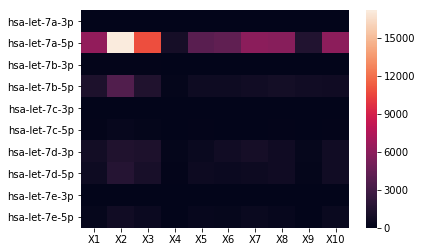

In [2]:
import seaborn as sbn
from matplotlib import pyplot as plt
%matplotlib inline
sbn.heatmap(mir_counts.iloc[:10,:10])  # select the first 10 miRNAs and individuals
plt.show()

### Using raw counts for all miRNAs doesn't result in a very useful heatmap.

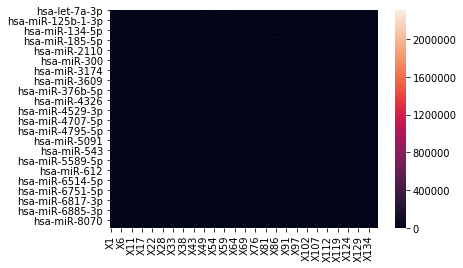

In [3]:
sbn.heatmap(mir_counts)
plt.show()

## Log2-transformed counts-per-million (logCPM)

In [4]:
mir_cpm = pd.read_csv('get_canonical/canon_mir_logCPM.csv', index_col=0)
mir_cpm.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138
hsa-let-7a-3p,2.474925,5.587668,-1.392591,1.234309,6.082710,-1.392591,6.951551,4.005840,4.592798,4.890635,...,-1.392591,-1.392591,3.842756,-1.392591,-1.392591,3.360152,-1.392591,5.037094,0.724079,5.260851
hsa-let-7a-5p,11.821606,14.397996,16.536931,9.369801,14.857779,13.015057,14.335388,12.100140,10.986092,13.638089,...,12.223889,14.698401,14.328116,12.775353,15.199751,12.586946,11.316285,13.998248,12.396895,13.321535
hsa-let-7b-3p,5.589110,6.637579,9.625796,2.495448,7.765164,5.777791,7.535033,5.022180,2.500450,6.530026,...,5.337535,7.863207,7.071067,5.398776,7.466178,6.633097,5.022290,4.858752,2.068250,5.260851
hsa-let-7b-5p,9.568563,12.160092,13.637116,6.739557,12.145568,10.338021,11.337725,9.406264,9.962713,10.482872,...,9.641836,12.203951,11.366390,9.797243,12.366260,9.882122,9.138708,12.072477,9.447374,11.915869
hsa-let-7c-3p,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,...,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591,-1.392591


### Using the logCPMs results in a much more interesting heatmap.

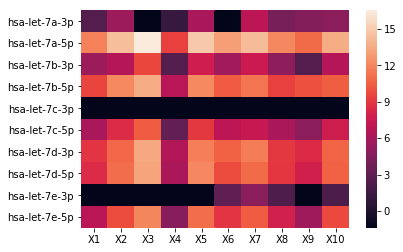

In [5]:
sbn.heatmap(mir_cpm.iloc[:10,:10])  # using 10 miRNAs and individuals
plt.show()

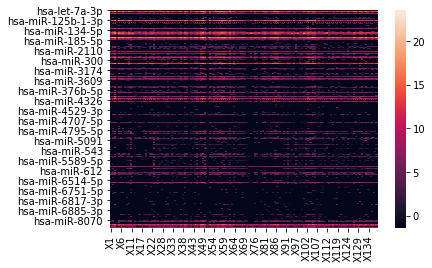

In [6]:
sbn.heatmap(mir_cpm)  # using all miRNAs and individuals
plt.show()

### Sort CPMs in non-ascending order.

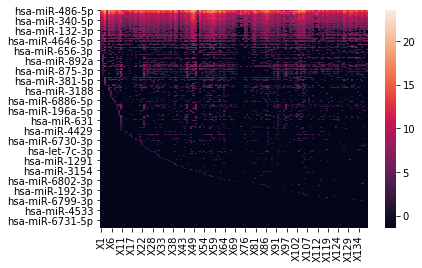

In [7]:
mir_cpm = mir_cpm.sort_values(by=list(mir_cpm.columns), ascending=False)
sbn.heatmap(mir_cpm)
plt.show()

### Quick sanity check that my sorting method maintains rows.

In [8]:
df = pd.DataFrame({'A': [1,2,3], 'B': [6,5,4], 'C': [9,0,8]})
df

,A,B,C
0,1,6,9
1,2,5,0
2,3,4,8


In [9]:
df.sort_values(by=list(df.columns), ascending=False)

,A,B,C
2,3,4,8
1,2,5,0
0,1,6,9


### Select the top 10 highly-expressed miRNAs.

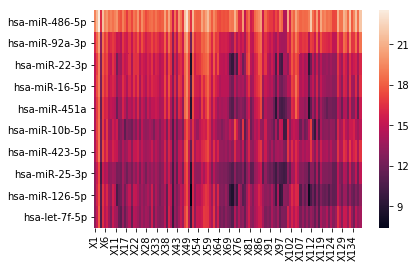

In [10]:
mir_top10 = mir_cpm.iloc[:10]
sbn.heatmap(mir_top10)
plt.show()

### Will need to select subsets of individuals and/or highlight demographic groups for this to be useful.